In [ ]:
# prompt: import the data file using collab

from google.colab import files

uploaded = files.upload()



Saving Zoo.csv to Zoo.csv


In [ ]:
#Implement a KNN model to classify the animals in to categorie
import pandas as pd
import numpy as np
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


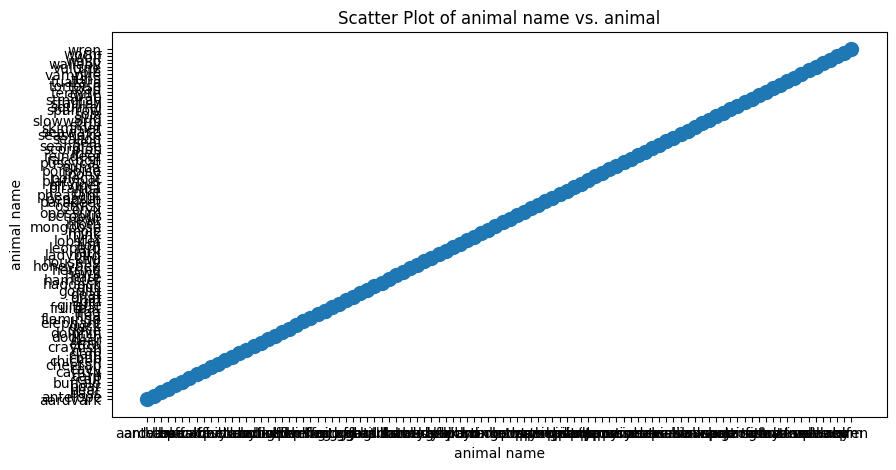

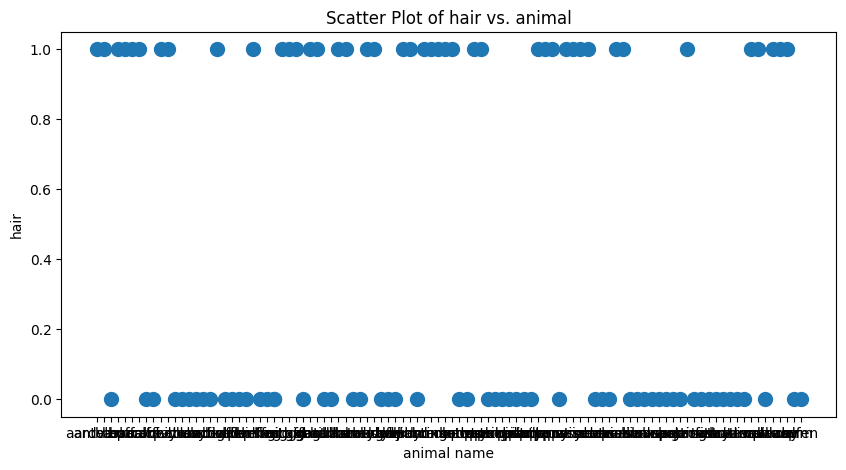

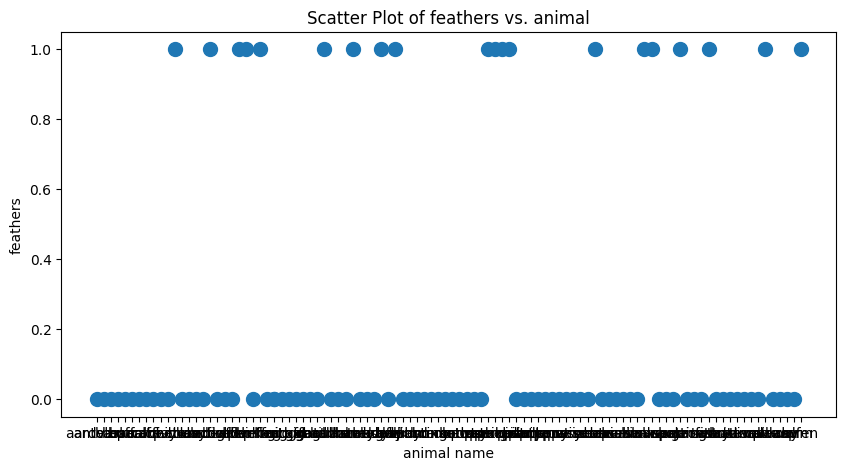

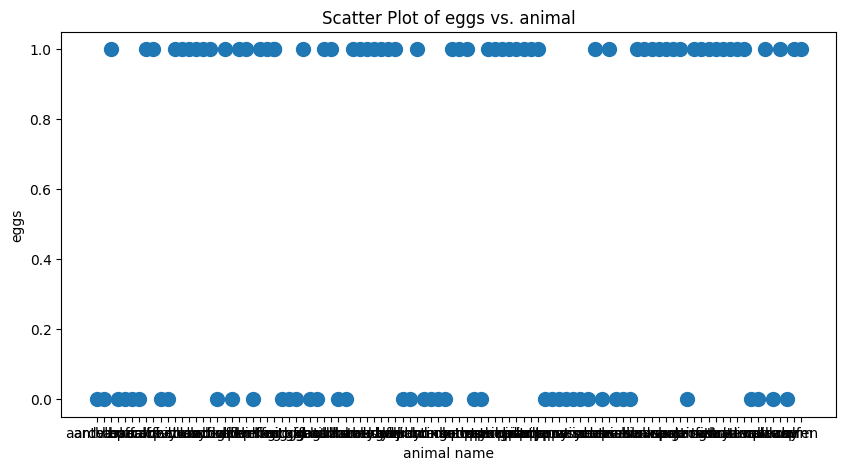

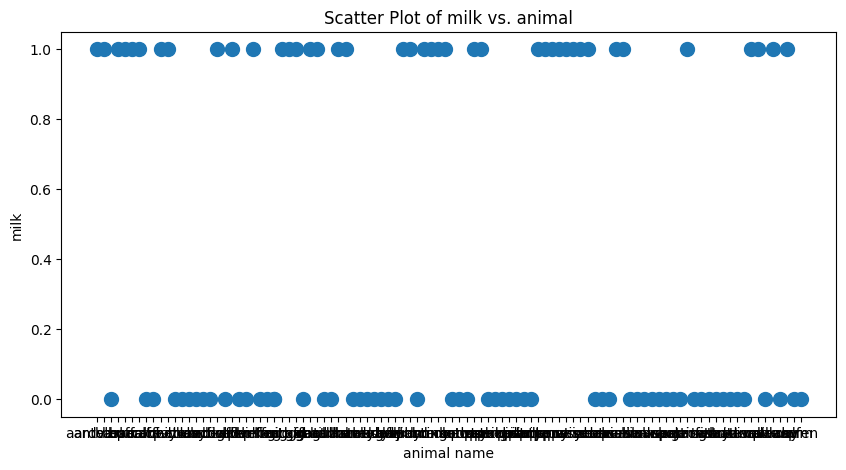

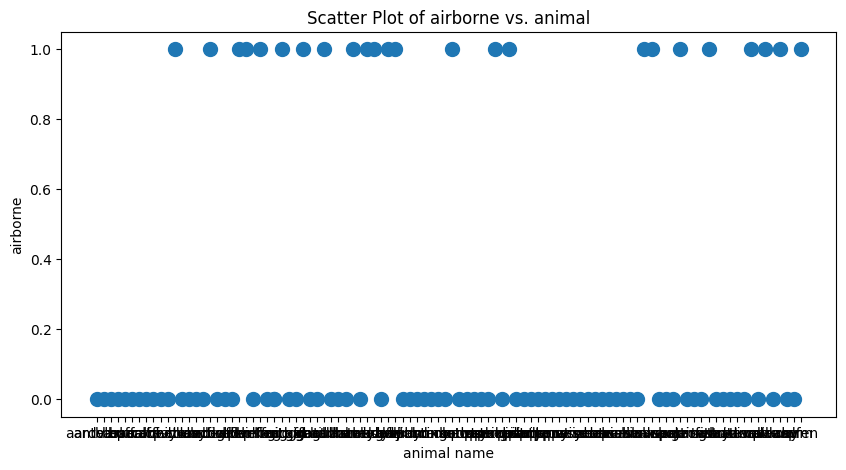

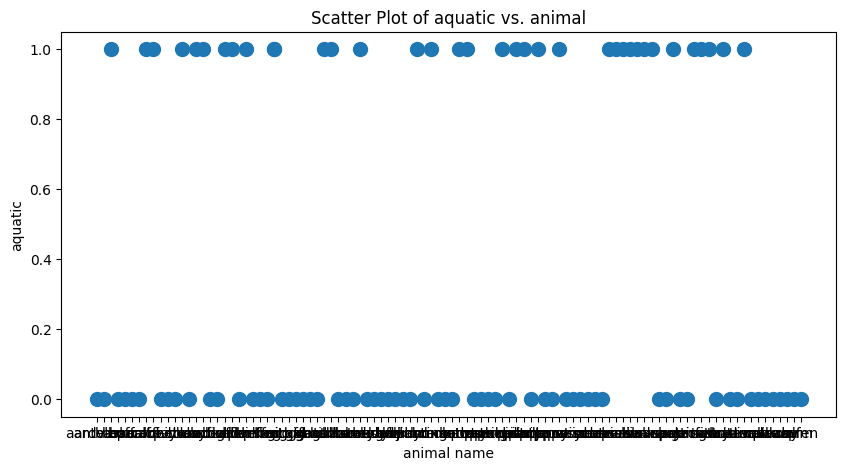

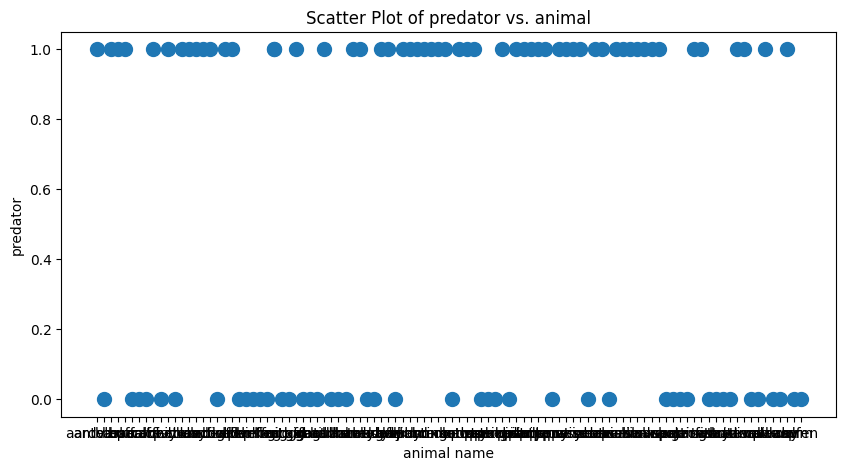

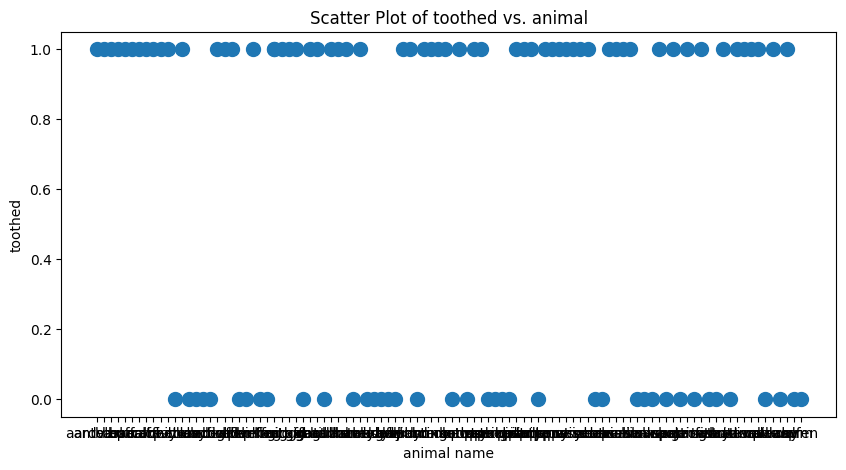

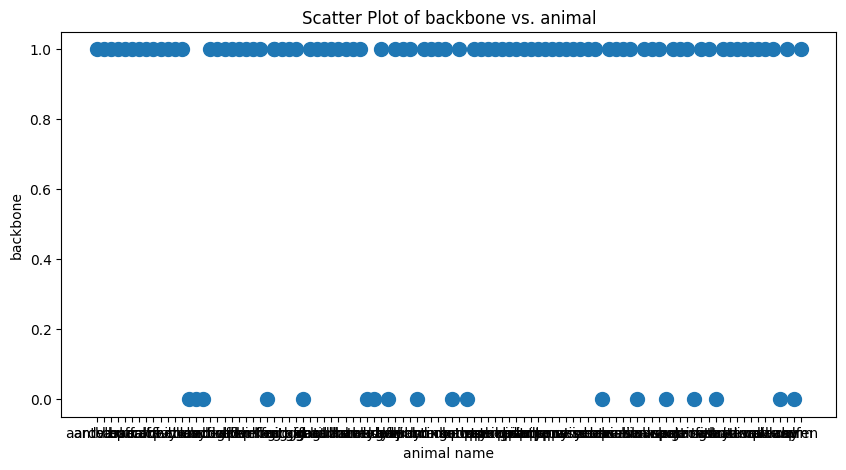

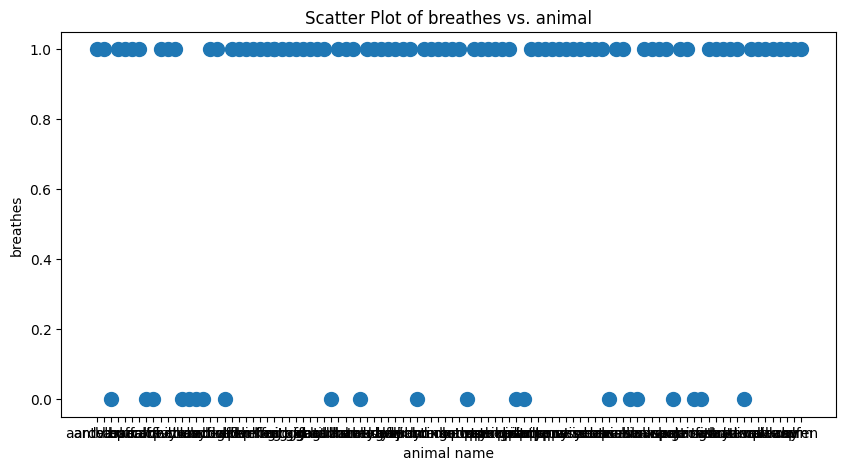

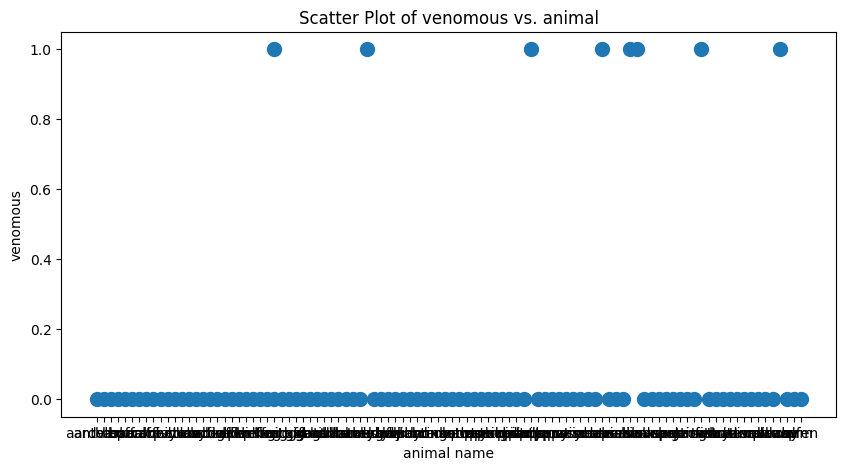

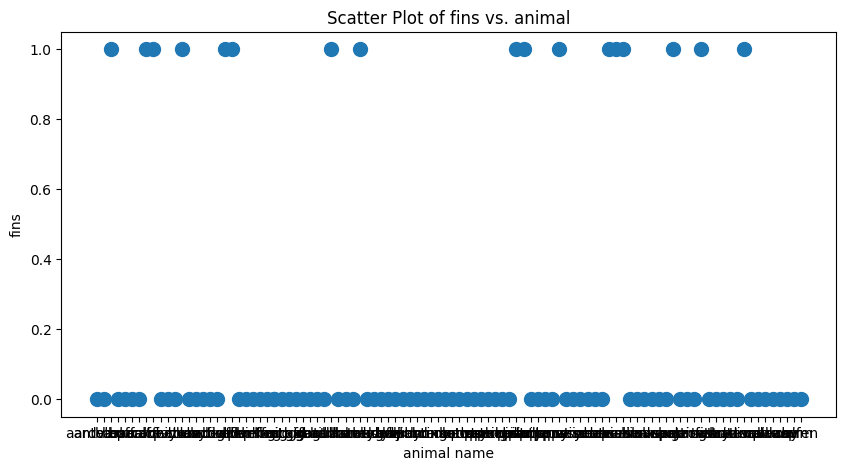

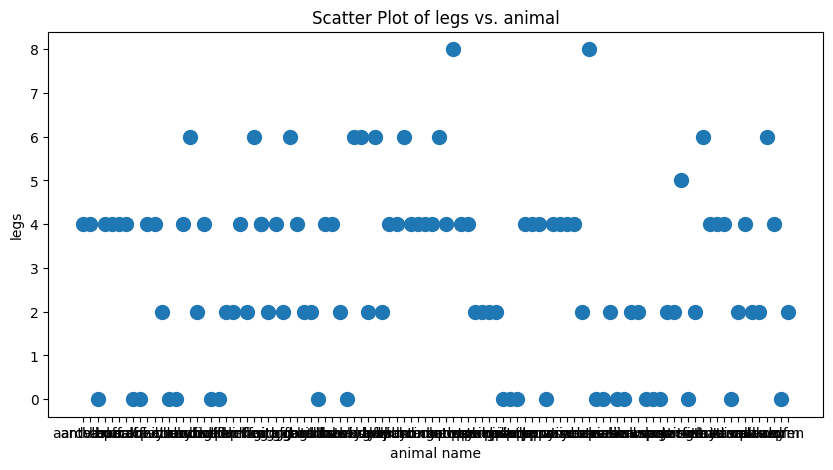

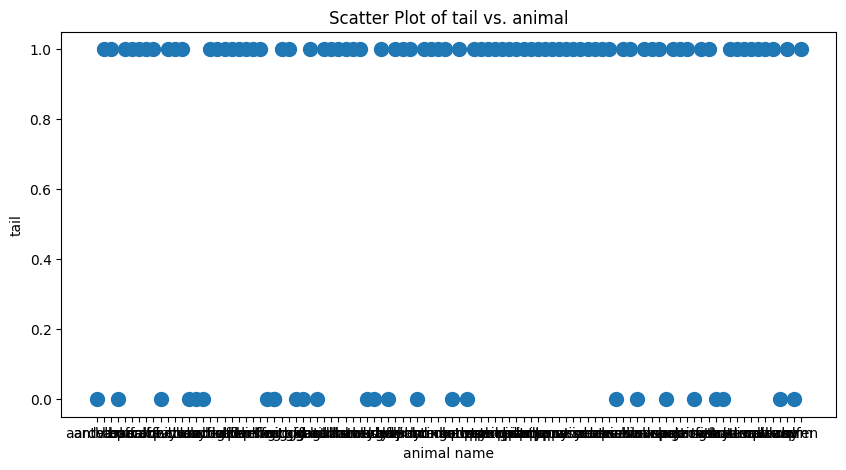

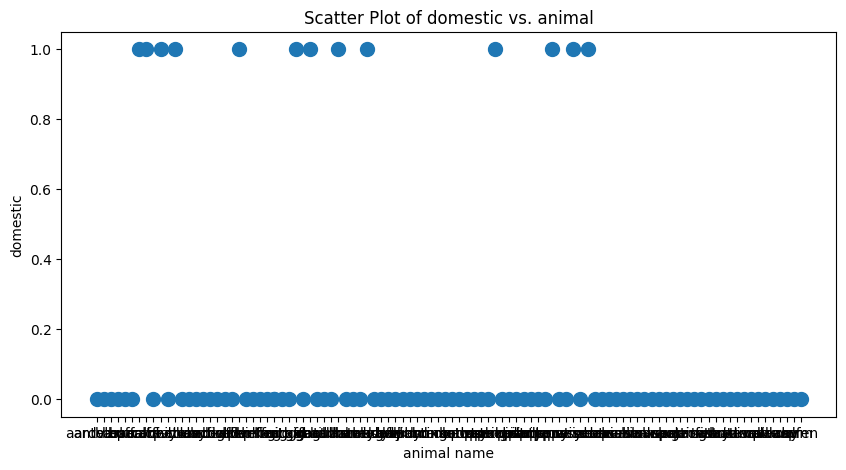

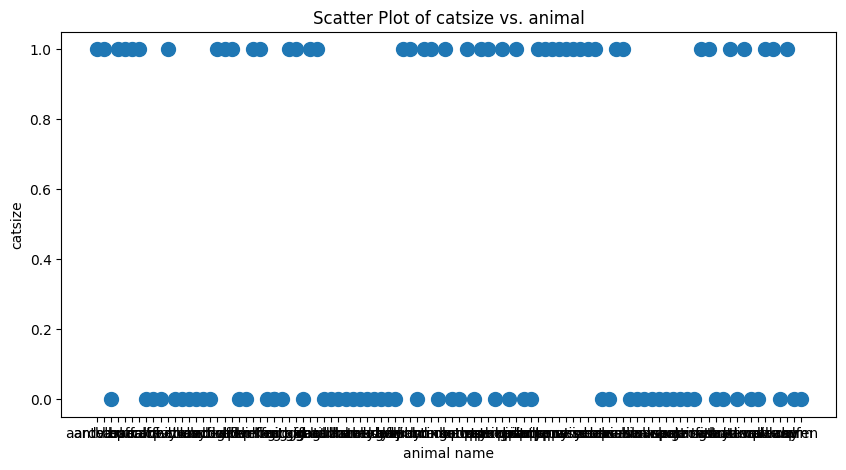

In [ ]:
# prompt: scatter plot all variables vs animal name with big scatter plot

import matplotlib.pyplot as plt

for col in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    plt.scatter(df['animal name'], df[col], s=100)
    plt.title(f'Scatter Plot of {col} vs. animal')
    plt.xlabel('animal name')
    plt.ylabel(col)
    plt.show()


animal name: ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair: [1 0]
feathers: [0 1]
eggs: [0 1]
milk: [1 0]
airborne: [0 1]
aquatic: [0 1]
pre

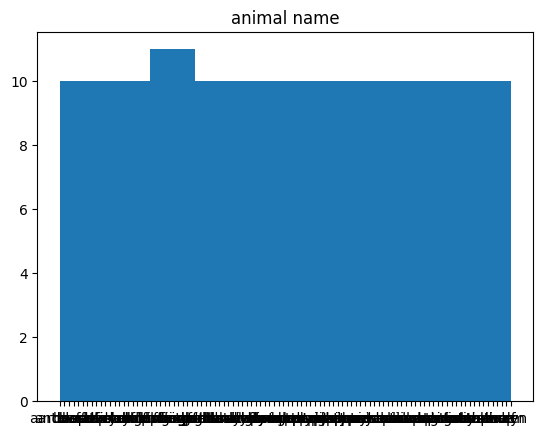

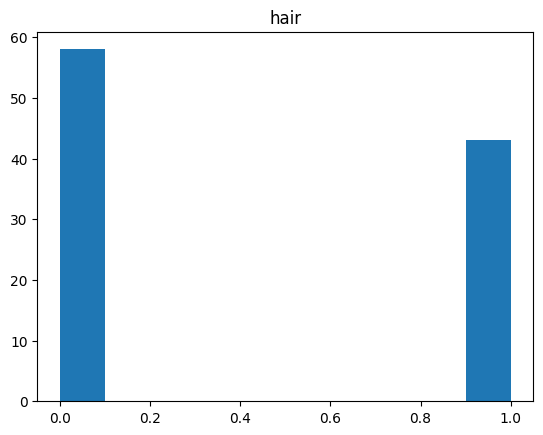

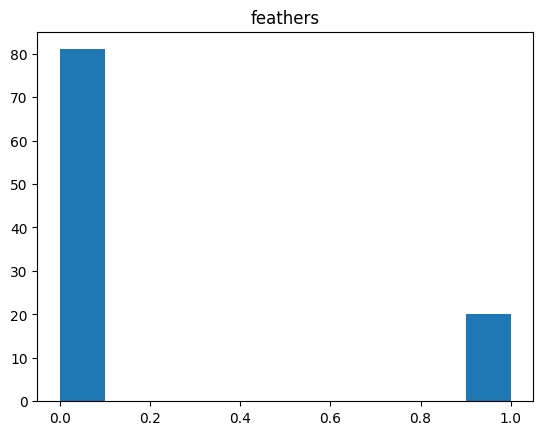

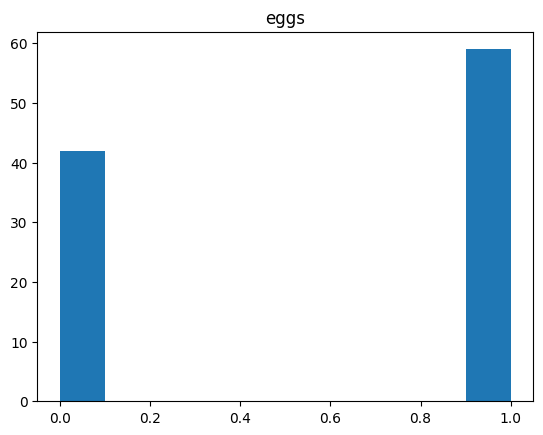

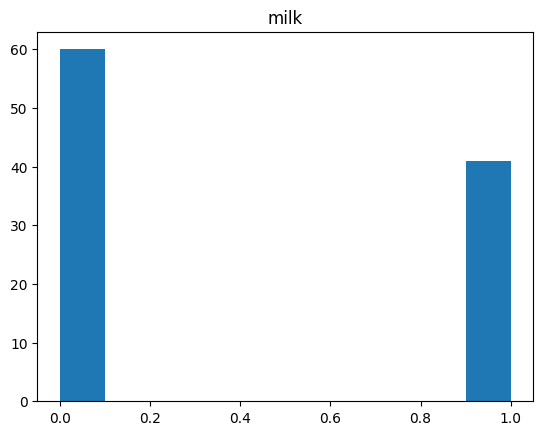

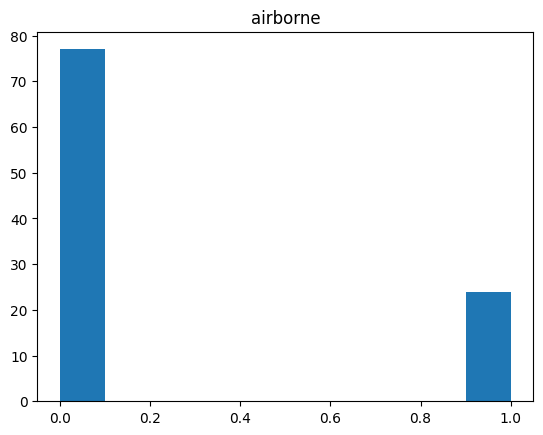

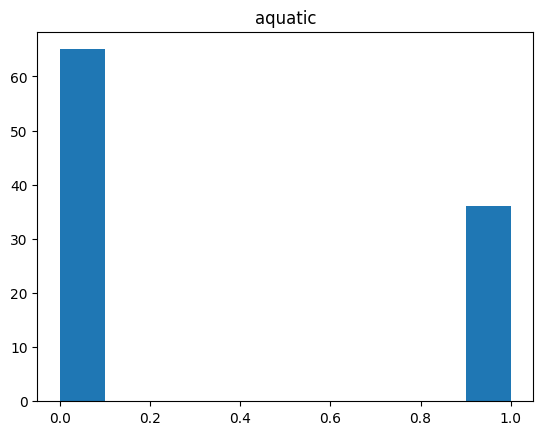

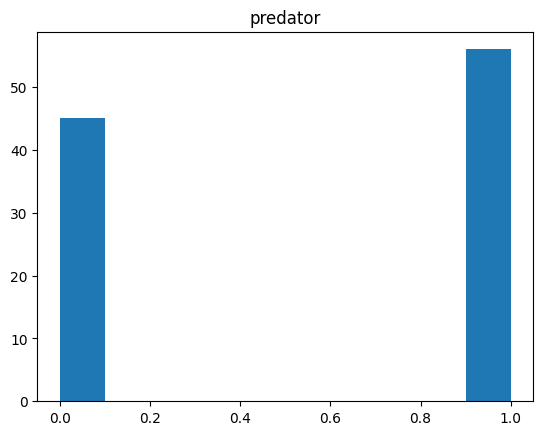

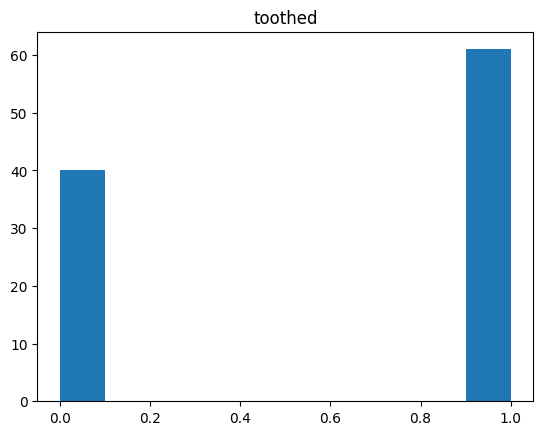

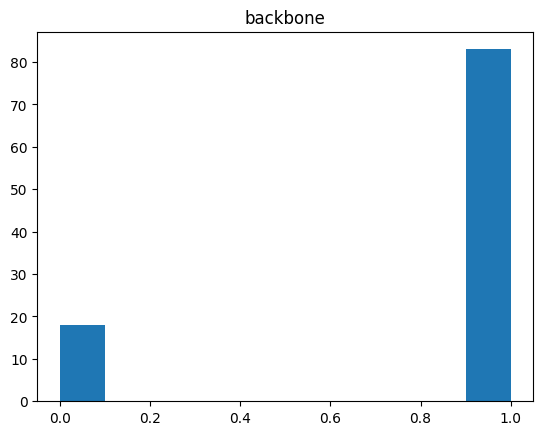

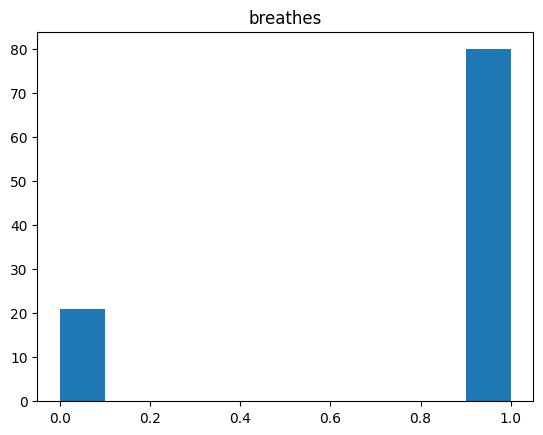

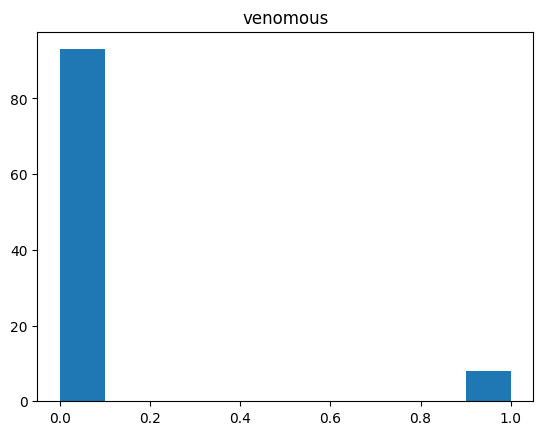

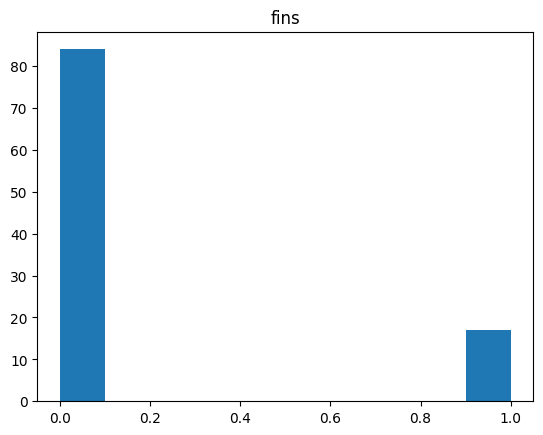

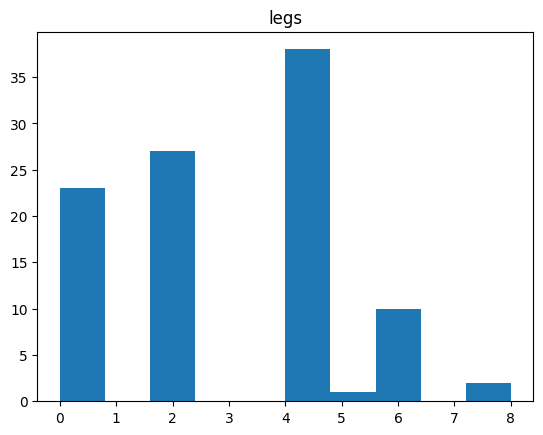

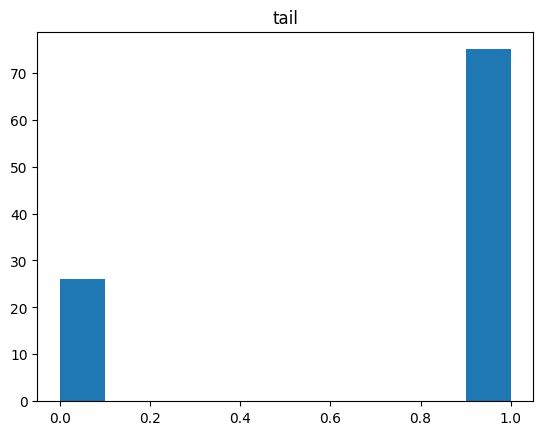

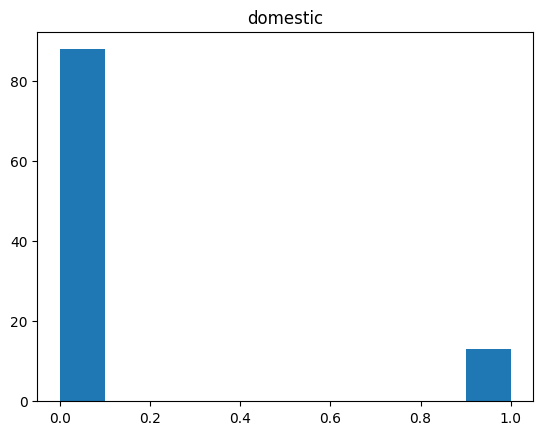

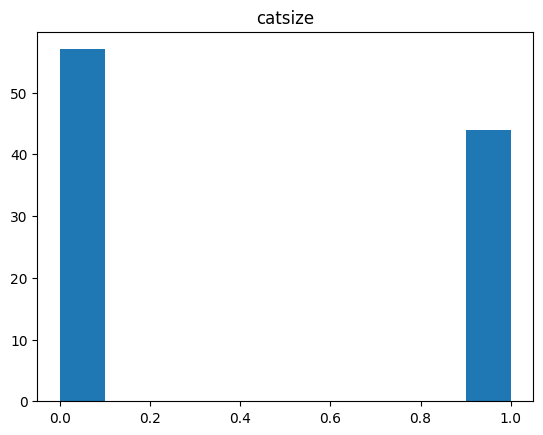

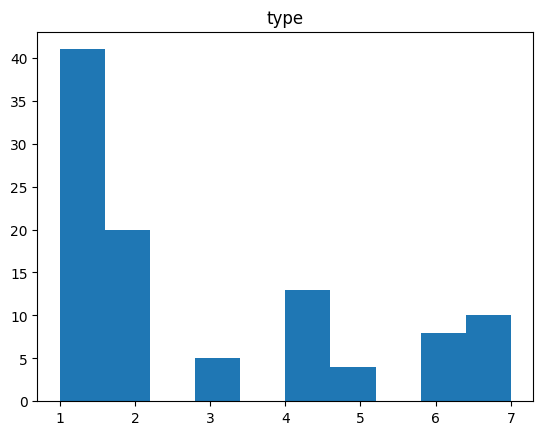

<ipython-input-7-9f36bac6c04f>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [ ]:


# Get the unique values of each column
for col in df.columns:
  print(f"{col}: {df[col].unique()}")

# Visualize the distribution of each column
import matplotlib.pyplot as plt

for col in df.columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

# Calculate the correlation matrix
df.corr()


In [ ]:
df.value_counts()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type
aardvark     1     0         0     1     0         0        1         1        1         1         0         0     4     0     0         1        1       1
polecat      1     0         0     1     0         0        1         1        1         1         0         0     4     1     0         1        1       1
seal         1     0         0     1     0         1        1         1        1         1         0         1     0     0     0         1        1       1
seahorse     0     0         1     0     0         1        0         1        1         0         0         1     0     1     0         0        4       1
scorpion     0     0         0     0     0         0        1         0        0         1         1         0     8     1     0         0        7       1
                                                                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
#label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column]= LE.fit_transform(df[column])

df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
Y=df['type']
x=df.iloc[:,0:17]

In [ ]:
# standardization is making our data in between -3 to +3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(x)
SS_X.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [ ]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# model fitting
logreg.fit(X_train,Y_train)
Y_pred_train = logreg.predict(X_train)
Y_pred_test = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy score: ", ac1.round(2))
print("Testing Accuracy score: ", ac2.round(2))

Training Accuracy score:  1.0
Testing Accuracy score:  0.94


In [ ]:
# cross validation method
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  1.0
Cross validation Test score:  0.94


In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)

# model fitting
KNN.fit(X_train,Y_train)
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy score: ", ac1.round(2))
print("Testing Accuracy score: ", ac2.round(2))

Training Accuracy score:  0.84
Testing Accuracy score:  0.9


In [ ]:
# k = 11, with cross validation

# cross validation method
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30,random_state=i)
    KNN.fit(X_train,Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test = KNN.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.89
Cross validation Test score:  0.83


In [ ]:
# when k=3 Cross validation Training score:  0.97 Cross validation Test score:  0.92
# when k=5 Cross validation Training score:  0.95 Cross validation Test score:  0.88
# when k=7 Cross validation Training score:  0.92 Cross validation Test score:  0.85
# when k=9 Cross validation Training score:  0.89 Cross validation Test score:  0.83
# when k=11 Cross validation Training score:  0.88 Cross validation Test score:  0.83


In [45]:
#Prepare a model for glass classification using KNN
# prompt: import the data file using collab

from google.colab import files

uploaded = files.upload()



Saving glass.csv to glass (1).csv


In [46]:
import pandas as pd
import numpy as np
df1=pd.read_csv('glass.csv')
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [47]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [49]:
df1.shape

(214, 10)

In [50]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

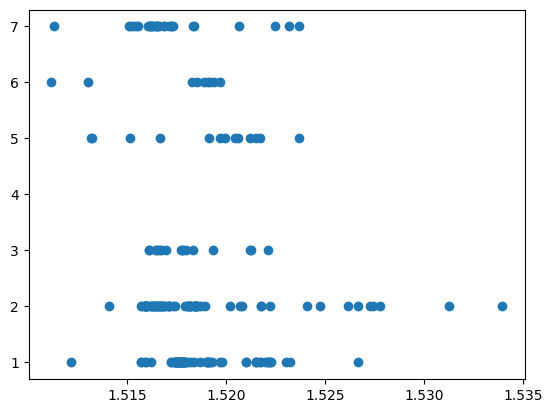

In [53]:
# Scatter plot of two features

plt.scatter(df1['RI'], df1['Type'])
plt.show()


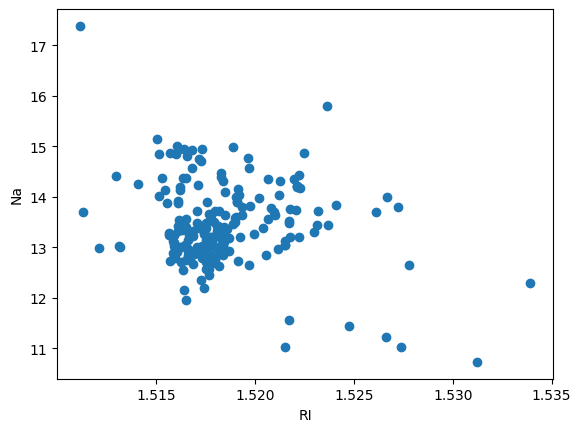

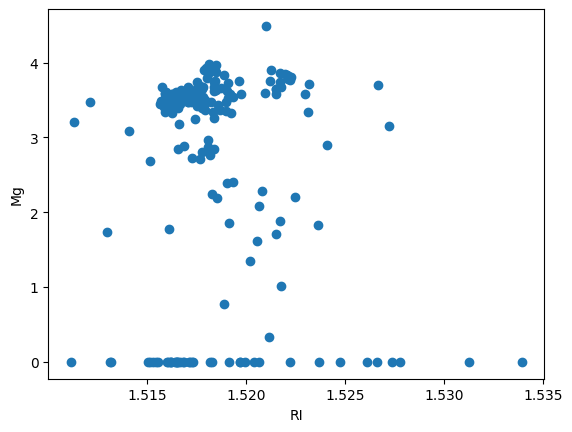

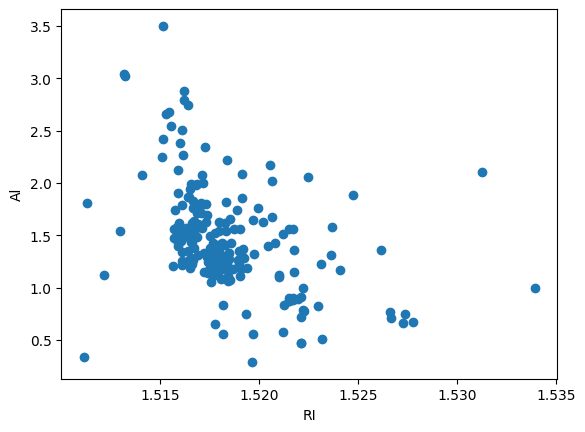

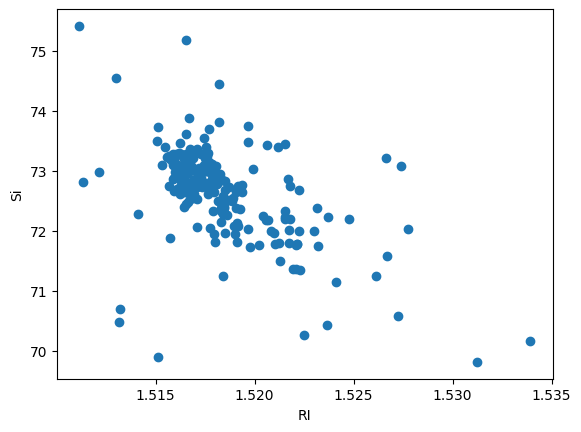

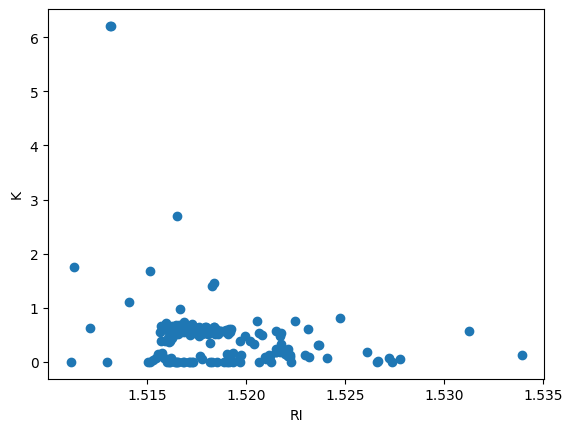

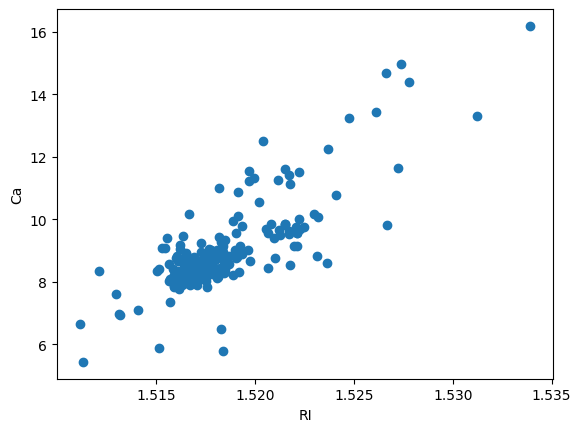

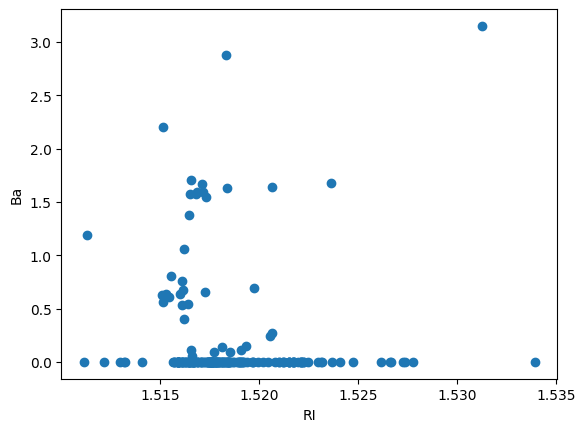

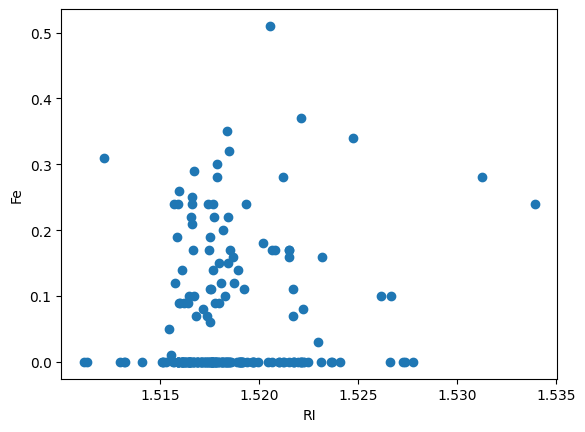

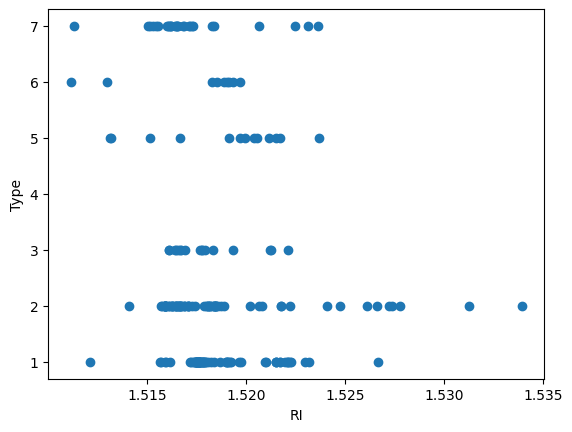

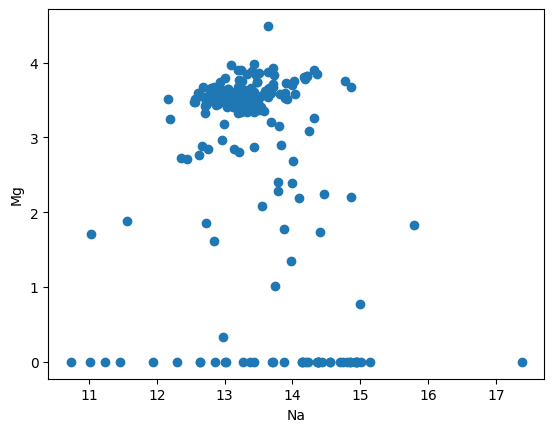

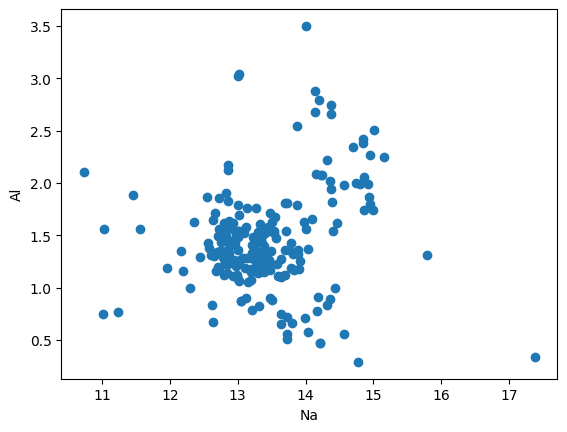

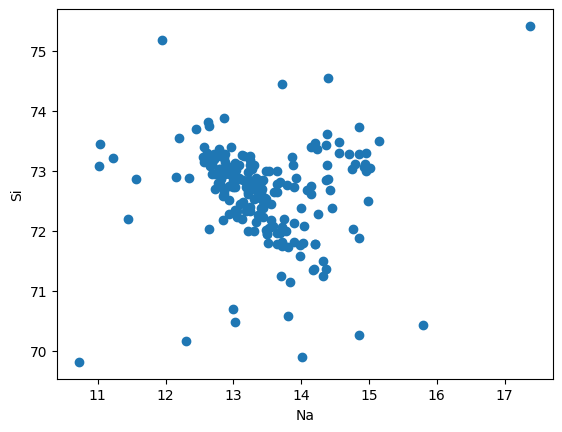

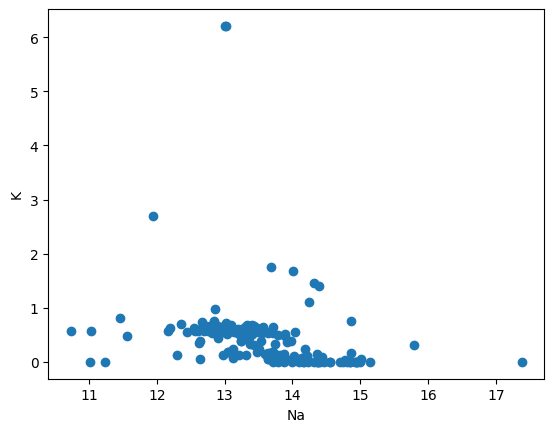

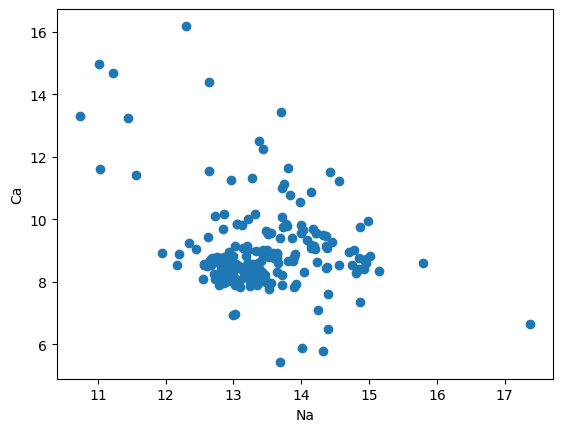

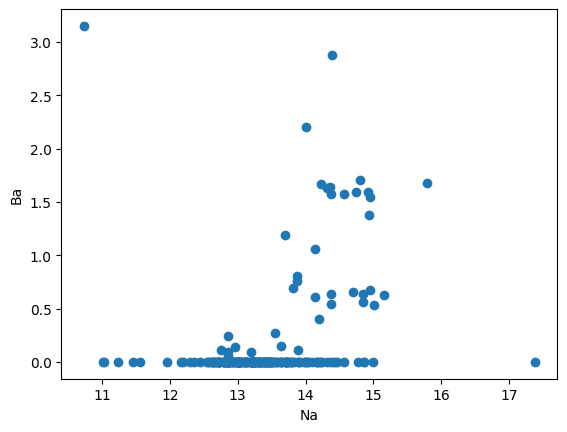

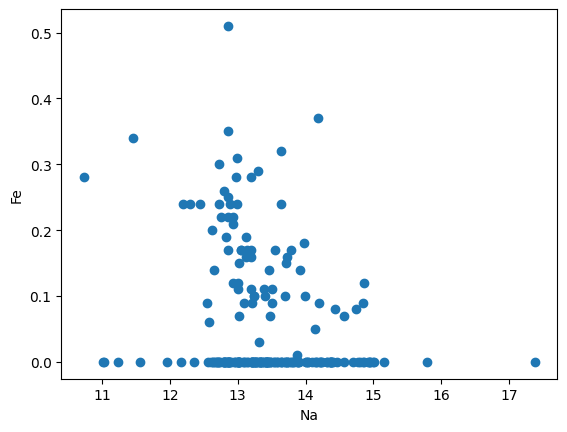

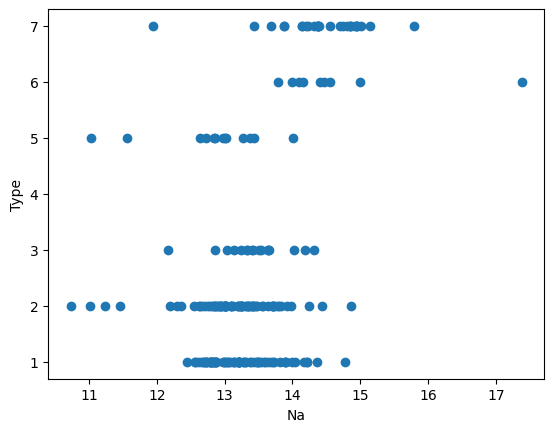

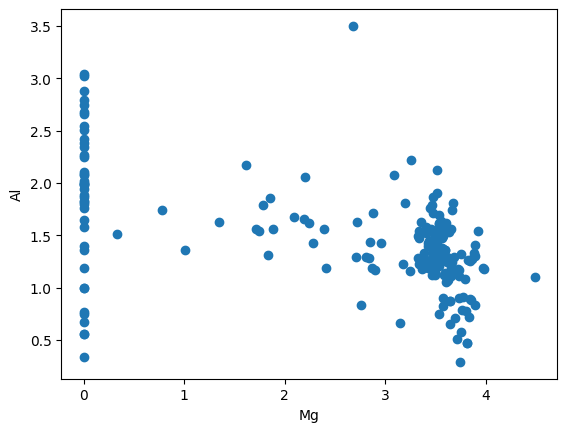

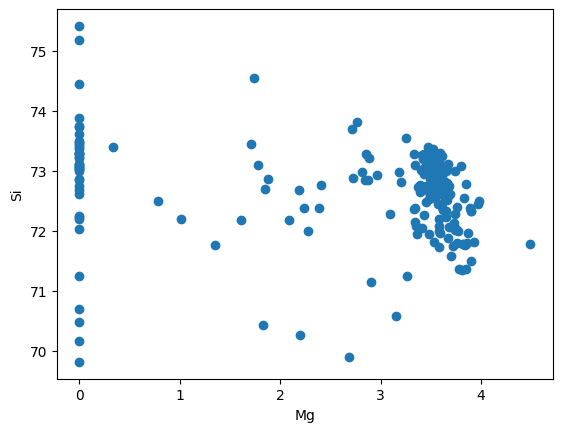

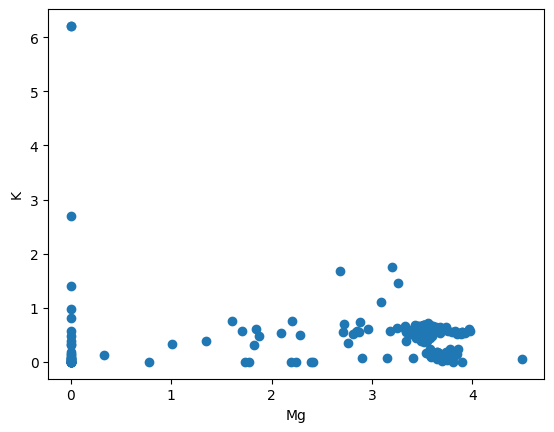

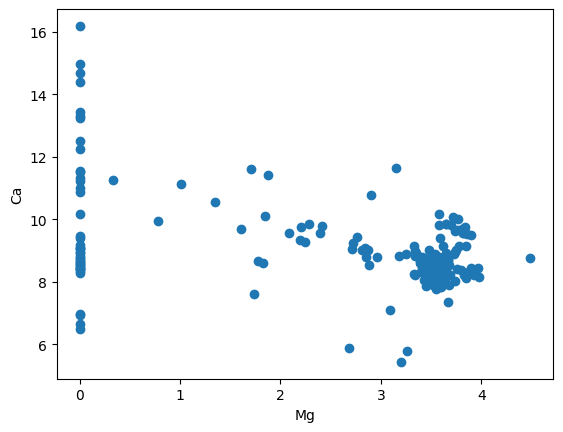

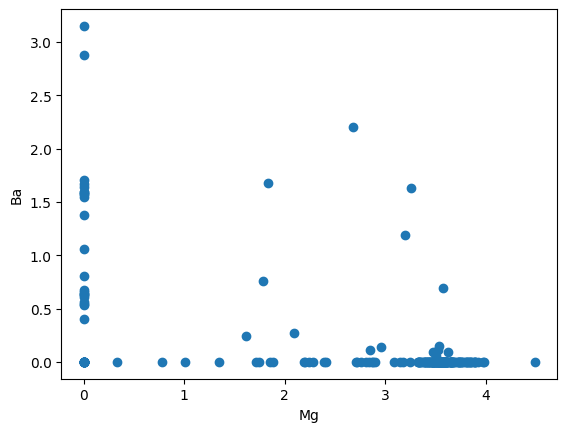

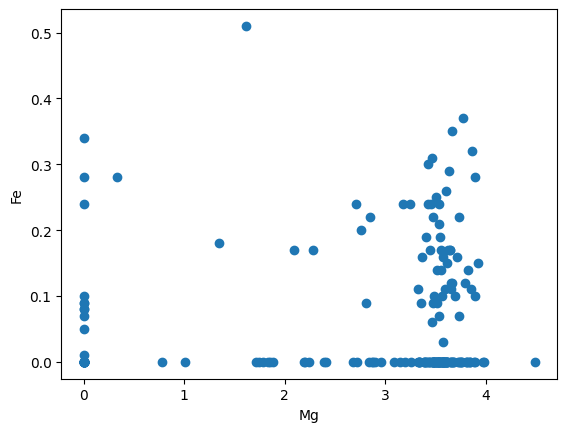

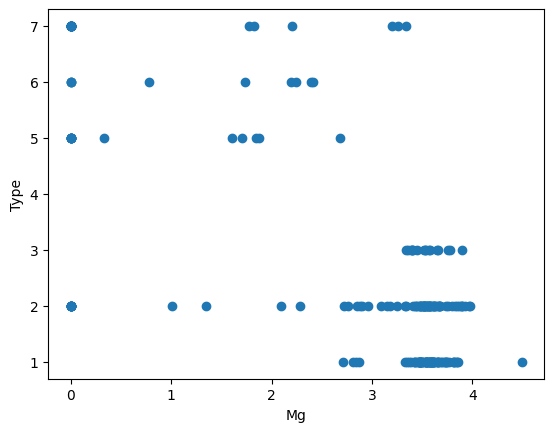

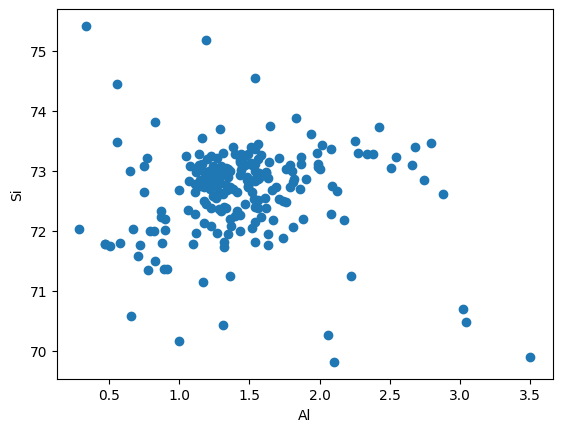

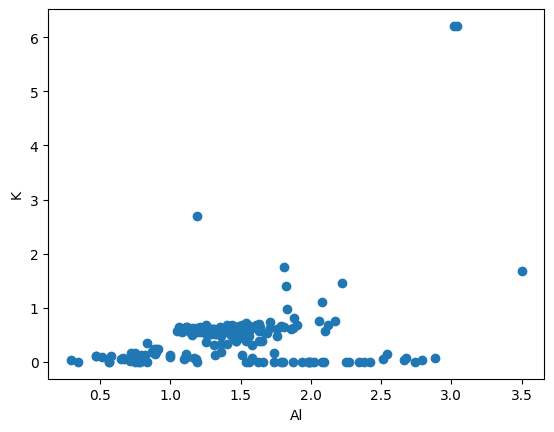

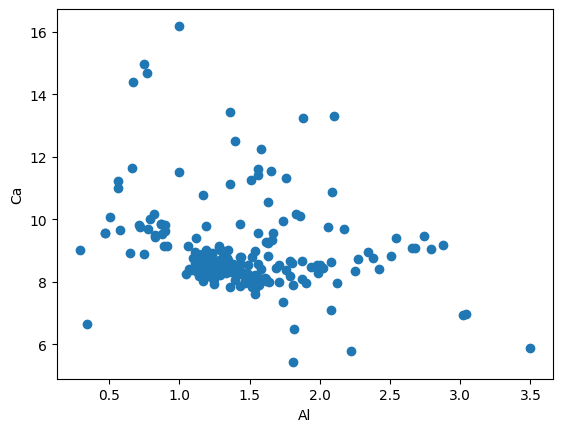

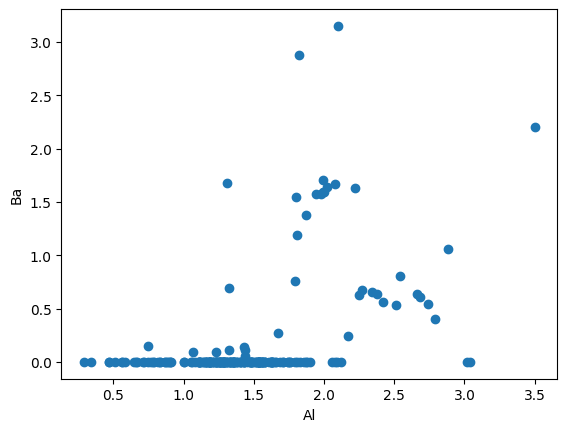

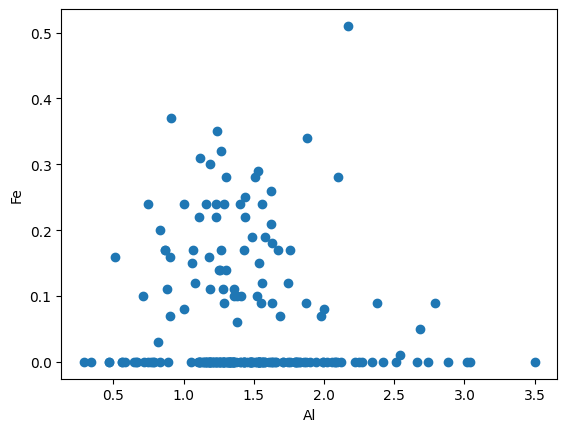

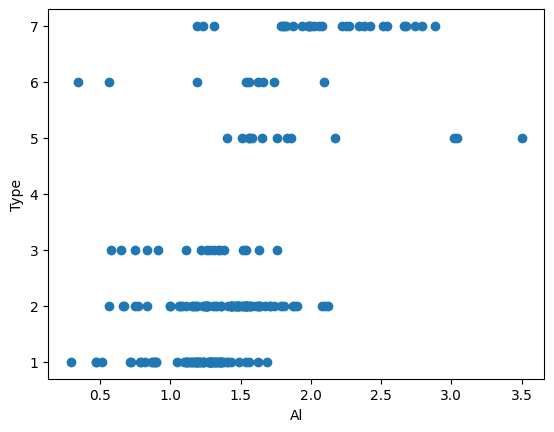

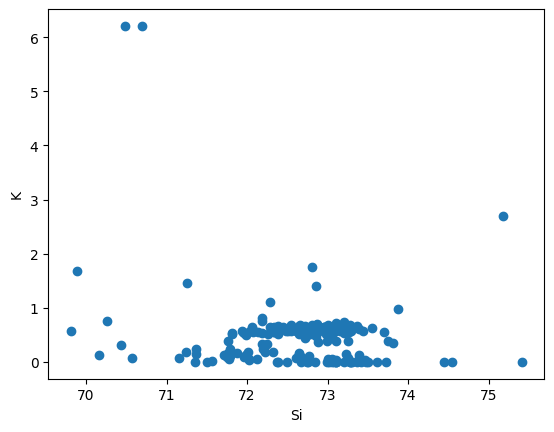

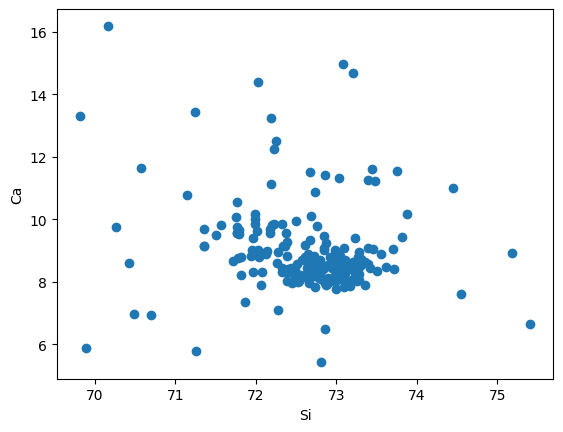

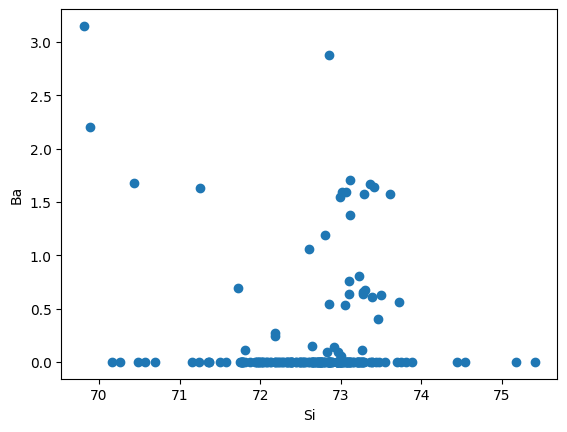

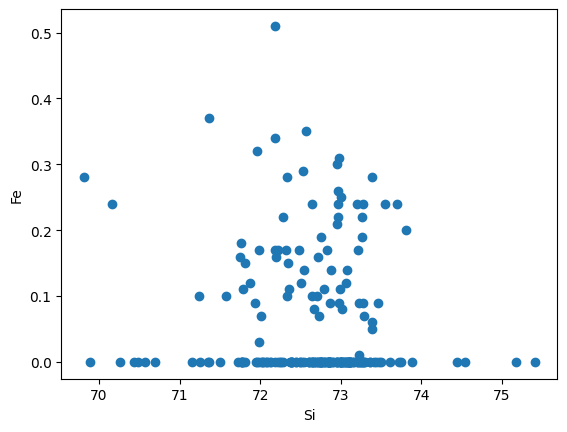

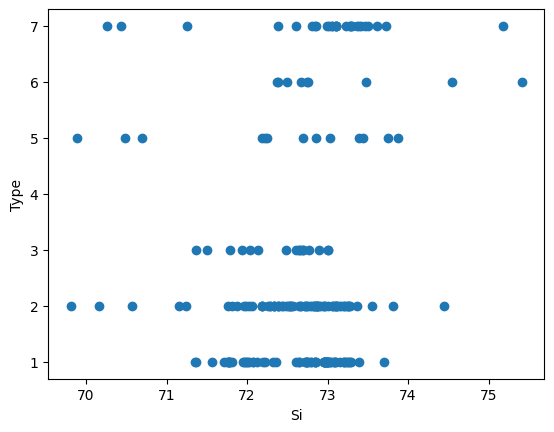

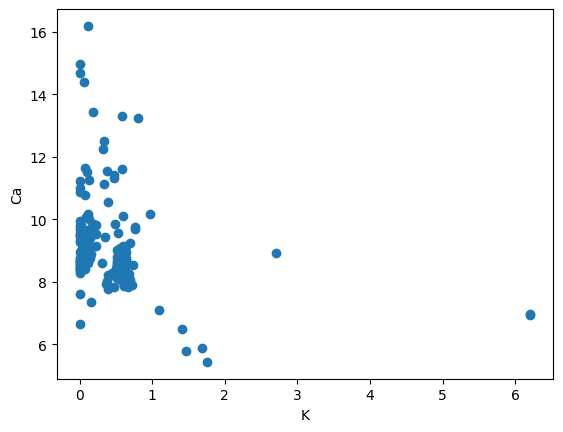

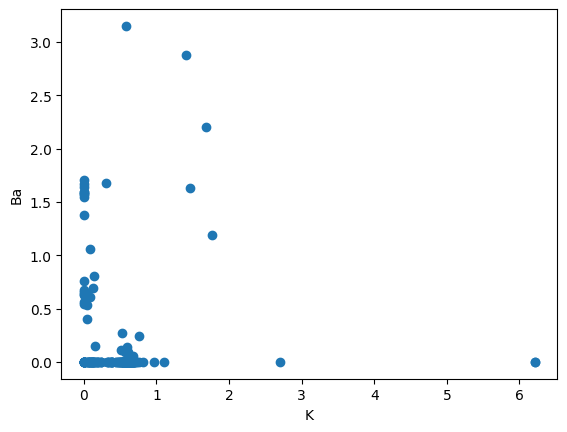

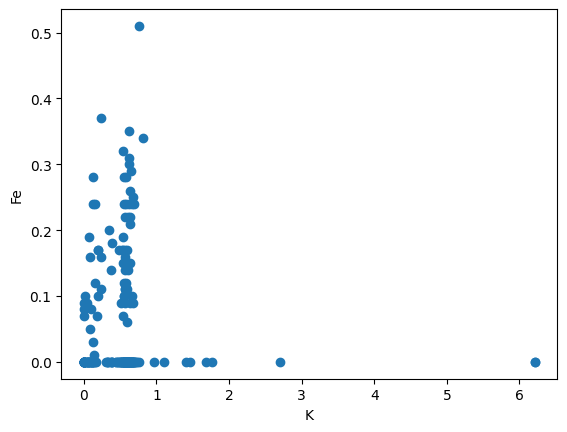

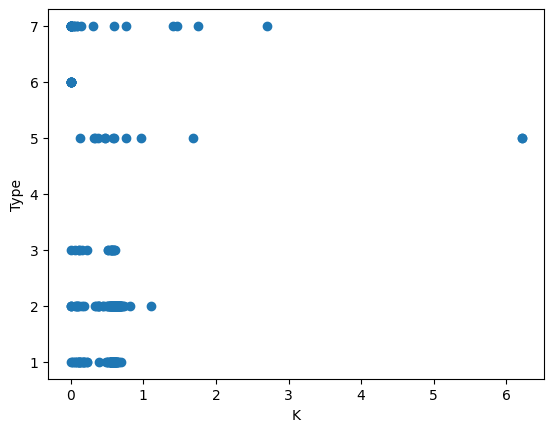

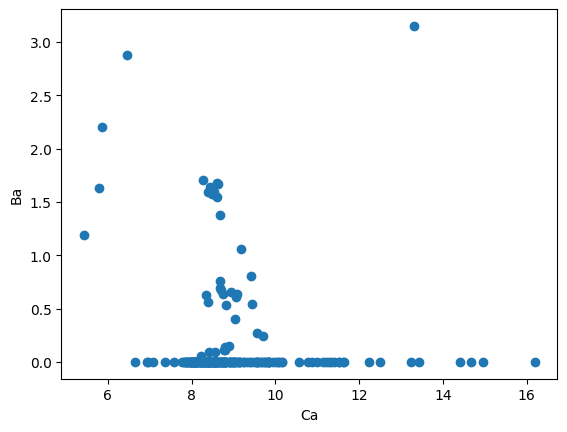

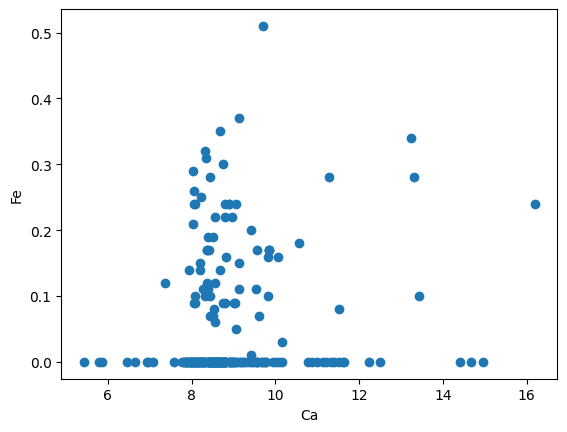

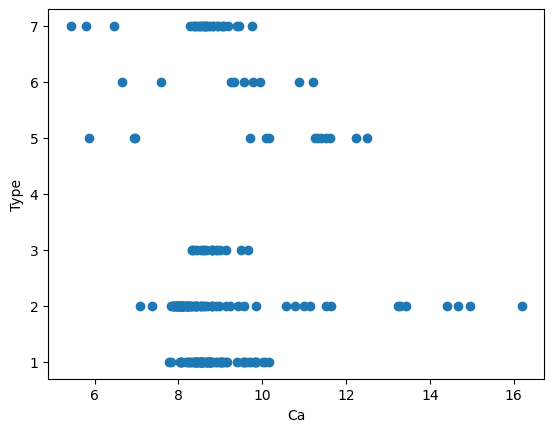

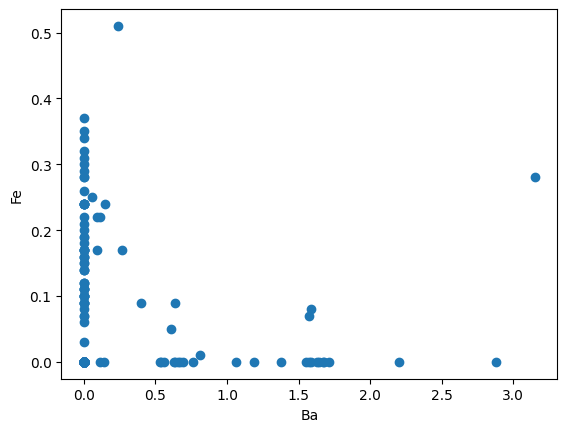

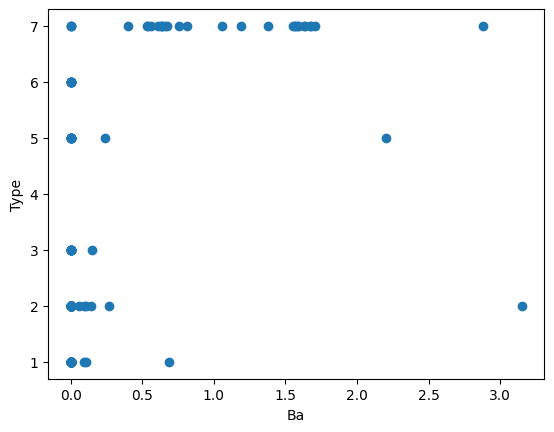

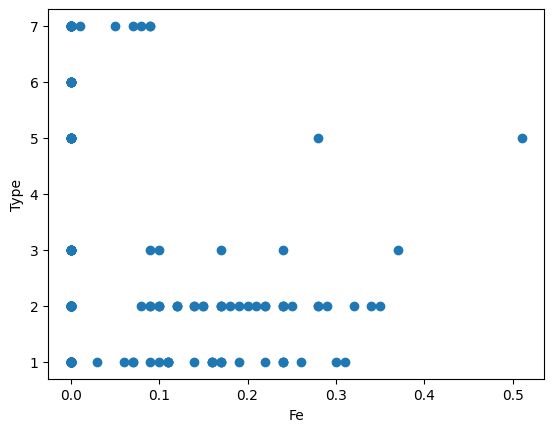

In [55]:
# prompt: scatter plot for all df1 columns

import matplotlib.pyplot as plt

for i in range(len(df1.columns)):
  for j in range(i+1, len(df1.columns)):
    plt.scatter(df1[df1.columns[i]], df1[df1.columns[j]])
    plt.xlabel(df1.columns[i])
    plt.ylabel(df1.columns[j])
    plt.show()


In [61]:
Y=df1['Type']
x=df1.iloc[:,0:9]

In [58]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
df1.shape

(214, 10)

In [62]:
# standardization is making our data in between -3 to +3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(x)
SS_X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [63]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# model fitting
logreg.fit(X_train,Y_train)
Y_pred_train = logreg.predict(X_train)
Y_pred_test = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy score: ", ac1.round(2))
print("Testing Accuracy score: ", ac2.round(2))

Training Accuracy score:  0.71
Testing Accuracy score:  0.62


In [64]:
# cross validation method
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.71
Cross validation Test score:  0.62


In [80]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

# model fitting
KNN.fit(X_train,Y_train)
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy score: ", ac1.round(2))
print("Testing Accuracy score: ", ac2.round(2))

Training Accuracy score:  0.73
Testing Accuracy score:  0.58


In [81]:
# k = 11, with cross validation

# cross validation method
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.30,random_state=i)
    KNN.fit(X_train,Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test = KNN.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.71
Cross validation Test score:  0.64


In [ ]:
|# when k=3 Cross validation Training score:  0.82 Cross validation Test score:  0.67
# when k=5 Cross validation Training score:  0.74 Cross validation Test score:  0.64
# when k=7 Cross validation Training score:  0.70 Cross validation Test score:  0.63
# when k=9 Cross validation Training score:  0.71 Cross validation Test score:  0.64
# when k=11 Cross validation Training score:  0.69 Cross validation Test score:  0.63 is gives us least variance that makes my model best fit when k=11
